In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import contractions
from spellchecker import SpellChecker
from nltk.stem import PorterStemmer

In [2]:
# download punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# check for stopwords in your corpus(data)
stop_words = nltk.corpus.stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
# remove negative stopwords
stop_words.remove('no')
stop_words.remove('against')
stop_words.remove('nor')
stop_words.remove('not')
stop_words.remove('until')
stop_words.remove('off')
stop_words.remove('but')

In [6]:
# read the dataset
df = pd.read_csv(r'C:\Users\user\Desktop\RAIN\NLP\RAIN_DL\Lecture_10\yelp.xls')

In [7]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [8]:
# select only the reviews and stars given by customers
df = df[['text','stars']]
df.head()

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5


In [9]:
df['stars'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [10]:
# divide into positive and negative sentiment based on stars given by customers
df['sentiment'] = df['stars'].apply(lambda x:1 if x>=4 else 0)

In [11]:
# new dataframe with sentiment in the features
# 1 for positive sentiment 
# 0 for negative sentiment
df

,text,stars,sentiment
0,My wife took me here on my birthday for breakf...,5,1
1,I have no idea why some people give bad review...,5,1
2,love the gyro plate. Rice is so good and I als...,4,1
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,1
4,General Manager Scott Petello is a good egg!!!...,5,1
...,...,...,...
9995,First visit...Had lunch here today - used my G...,3,0
9996,Should be called house of deliciousness!\n\nI ...,4,1
9997,I recently visited Olive and Ivy for business ...,4,1
9998,My nephew just moved to Scottsdale recently so...,2,0


In [12]:
df['sentiment'].value_counts()

sentiment
1    6863
0    3137
Name: count, dtype: int64

In [13]:
from wordcloud import WordCloud

In [14]:
# concatenate text from each sentiment 
reviews_neg = ''.join(df[df['sentiment'] ==0]['text'].values)
reviews_pos = ''.join(df[df['sentiment'] ==1]['text'].values)


In [15]:
# word cloud for the sentiments
word_cloud = WordCloud(collocations=False, background_color = 'white')
word_cloud.generate(reviews_neg)

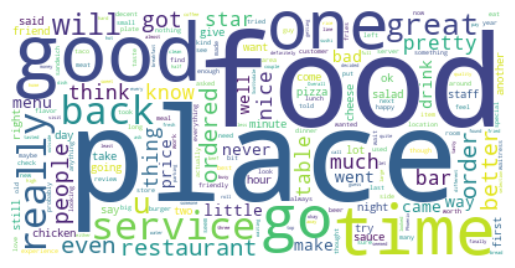

In [17]:
# plot a graph for each sentiment
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# call the stemmer object
ps = PorterStemmer()

In [16]:
df['text'][0]


'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [17]:
# define a fucntion
def text_preprocessing(text):
    # convert each character to a lower case
    text = text.lower().strip()
    # reg-ex to replace any characters that are not lowercase or whitespaces with a space
    text = re.sub(pattern = r"[^a-z\s]", repl = ' ', string= text, flags = re.A)
    # replacing the newline with a space
    text = re.sub(pattern = r'\n', repl = ' ', string = text, flags=re.A)
    # fixing contractions(e.g stretching can't to cannot)
    text = contractions.fix(text)
    # converting a text to list and removing stopwords
    text = [t for t in text.split() if t not in stop_words]
    # applying stemming
    text = [ps.stem(t) for t in text]
    # joining list of words in a text back to a string and separating with a space
    text = ' '. join(text)
    return text
    

In [18]:
# an example of a text applying the text_preprocessing fucntion to it
text_preprocessing(df['text'][0])

'wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semi busi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ever pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came piec griddl bread amaz absolut made meal complet best toast ever anyway wait go back'

In [19]:
# creating a new column called 'cleaned text'
df['cleaned text'] = df['text'].apply(text_preprocessing)
df

,text,stars,sentiment,cleaned text
0,My wife took me here on my birthday for breakf...,5,1,wife took birthday breakfast excel weather per...
1,I have no idea why some people give bad review...,5,1,no idea peopl give bad review place goe show p...
2,love the gyro plate. Rice is so good and I als...,4,1,love gyro plate rice good also dig candi select
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,1,rosi dakota love chaparr dog park conveni surr...
4,General Manager Scott Petello is a good egg!!!...,5,1,gener manag scott petello good egg not go deta...
...,...,...,...,...
9995,First visit...Had lunch here today - used my G...,3,0,first visit lunch today use groupon order brus...
9996,Should be called house of deliciousness!\n\nI ...,4,1,call hous delici could go item item blah blah ...
9997,I recently visited Olive and Ivy for business ...,4,1,recent visit oliv ivi busi last week visit con...
9998,My nephew just moved to Scottsdale recently so...,2,0,nephew move scottsdal recent bunch friend brou...


In [20]:
# taking 'cleaned text' as X and sentiment as y
x = df['cleaned text']
y = df['sentiment']

In [21]:
# importing the Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# saving the TfidfVectorizer into a variable
vectorizer = TfidfVectorizer()
# fitting and transforming the cleaned text(x) on the tfidfvectorizer
word_vectors = vectorizer.fit_transform(x)

In [23]:
# coverting the word vectors to an array
word_vectors.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaaaaalright', ..., 'zweigel', 'zwiebelkrut',
       'zzzzzzzzzzzzzzzzz'], dtype=object)

In [27]:
pd.DataFrame(data = word_vectors.toarray(), columns = vectorizer.get_feature_names_out())

,aa,aaa,aaaaaalright,aaaamaz,aaammmazz,aaand,aah,aand,aaron,aarp,...,zuchinni,zuma,zumaroka,zumba,zupa,zur,zuzu,zweigel,zwiebelkrut,zzzzzzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# import train_test_split 
from sklearn.model_selection import train_test_split

In [29]:
# split your dataset into a trainset and a testset
x_train,x_test,y_train,y_test = train_test_split(word_vectors.toarray(), y ,test_size = 0.2, stratify = y, random_state = 5)

In [30]:
x_train.shape

(8000, 25668)

In [31]:
# import model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [55]:
# creat an object of the models
lr = LogisticRegression(class_weight='balanced')
nb = GaussianNB()
sv = SVC()
mnb = MultinomialNB()

In [71]:
# fitting the dataet on the logistic regression model
lr.fit(x_train,y_train)

LogisticRegression()

In [73]:
# predicting on your testset with the logistic regressio model
y_pred_lr = lr.predict(x_test)

In [75]:
# classification report of the logistic regression model
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.60      0.84      0.70       449
           1       0.95      0.84      0.89      1551

    accuracy                           0.84      2000
   macro avg       0.77      0.84      0.79      2000
weighted avg       0.87      0.84      0.85      2000



In [76]:
# fitting the dataet on the GaussianNB model 
nb.fit(x_train,y_train)

GaussianNB()

In [77]:
# predicting on your testset with the GaussianNB model
y_pred_nb = nb.predict(x_test)

In [78]:
# classification report of the GaussianNB regression model
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.60      0.33      0.43      1135
           1       0.45      0.71      0.55       865

    accuracy                           0.50      2000
   macro avg       0.52      0.52      0.49      2000
weighted avg       0.53      0.50      0.48      2000



In [35]:
# fitting the dataet on the MultinomialNB model
mnb.fit(x_train,y_train)

MultinomialNB()

In [37]:
# predicting on your testset with the MultinomialNB model
y_pred_mnb = mnb.predict(x_test)

In [38]:
# classification report of the MultinomialNB model
print(classification_report(y_pred_mnb,y_test))

              precision    recall  f1-score   support

           0       0.01      1.00      0.03         8
           1       1.00      0.69      0.82      1992

    accuracy                           0.69      2000
   macro avg       0.51      0.84      0.42      2000
weighted avg       1.00      0.69      0.81      2000



In [ ]:
sv.fit(x_train,y_train)

In [39]:
# importing the necesso
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [40]:
tokenizer = Tokenizer(num_words = 10000)
X_tokens = tokenizer.fit_on_texts(x)

In [41]:
X_seq = tokenizer.texts_to_sequences(x)
X_seq[0]

[386,
 167,
 584,
 174,
 175,
 1133,
 173,
 84,
 182,
 226,
 2047,
 976,
 375,
 1445,
 295,
 175,
 5,
 315,
 496,
 426,
 399,
 27,
 6,
 3,
 294,
 37,
 496,
 1319,
 9,
 55,
 1538,
 9,
 1588,
 1418,
 1523,
 698,
 34,
 112,
 37,
 96,
 87,
 432,
 1006,
 1339,
 89,
 13,
 108,
 115,
 40,
 27,
 175,
 359,
 1446,
 1610,
 276,
 656,
 2255,
 147,
 73,
 79,
 380,
 4865,
 148,
 108,
 375,
 84,
 88,
 400,
 34,
 502,
 112,
 427,
 81,
 41,
 8,
 18]

In [42]:
X_pad_seq = pad_sequences(X_seq, maxlen = 60, truncating = 'post')

In [43]:
vocabulary = tokenizer.word_index

In [44]:
X_pad_seq

array([[ 386,  167,  584, ...,  147,   73,   79],
       [  20,  568,   46, ...,   31,    4,   25],
       [   0,    0,    0, ..., 1406, 1082,  142],
       ...,
       [ 431,  121,  590, ..., 2027,   26,   39],
       [4301,  348,  200, ...,  118,  185,   55],
       [   0,    0,    0, ...,  131,   41,  357]])

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_pad_seq, y, test_size=0.2, random_state=5)

In [57]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [58]:
y_pred_lr = lr.predict(X_test)

In [59]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.51      0.34      0.41       959
           1       0.53      0.70      0.61      1041

    accuracy                           0.53      2000
   macro avg       0.52      0.52      0.51      2000
weighted avg       0.52      0.53      0.51      2000



In [61]:
r = '''The food was really tasty and evryone enjoyed it. I am glad I visited this place. The waiter was friendly, warm and receptive. The place was very neat and i love the
ambience'''

In [62]:
r_p = text_preprocessing(r)

In [63]:
r_vec = vectorizer.transform([r_p])

In [40]:
# lr.predict(r_vec)

In [ ]:
y_pred_sv = sv.predict(x_test)

In [ ]:
print(classification_report(y_pred_sv,y_test))

In [29]:
from gensim.models import word2vec

In [30]:
tokens_list = [text.split() for text in x.values]

In [31]:
wordvec = word2vec.Word2Vec(sentences = tokens_list,sg = 1,vector_size = 30,epochs=10)

In [32]:
vocabulary = wordvec.wv.index_to_key
# vocabulary

In [33]:
word_vector = wordvec.wv.vectors

In [34]:
word_vector

array([[ 0.01206759, -0.21499705,  0.49750847, ...,  0.331312  ,
         0.14221908, -0.55483234],
       [-0.01351502, -0.2915665 ,  0.5859286 , ...,  0.24933966,
         0.27001268, -0.48248795],
       [-0.19090909, -0.3565856 ,  0.5635771 , ...,  0.10368381,
         0.07738399, -0.42035937],
       ...,
       [-0.24971926, -0.37536436, -0.17005119, ...,  0.33351892,
         0.29248723, -0.6676845 ],
       [ 0.16605863, -0.44605097,  0.06892171, ...,  0.44198534,
         0.10556009, -0.4258489 ],
       [ 0.05090225, -0.36291555, -0.12209125, ...,  0.20842952,
         0.31689754, -0.5335081 ]], dtype=float32)

In [35]:
wordvec.wv.most_similar('great')

[('awesom', 0.8951325416564941),
 ('fantast', 0.8771195411682129),
 ('excel', 0.8751720786094666),
 ('good', 0.8679209351539612),
 ('terrif', 0.8642199635505676),
 ('outstand', 0.8554983735084534),
 ('especi', 0.8553678393363953),
 ('tremend', 0.839041531085968),
 ('fabul', 0.8380400538444519),
 ('nice', 0.8259771466255188)]

In [39]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y, random_state=5)

In [41]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [42]:
X_train_seq = pad_sequences(X_train_tokens, maxlen = 100, truncating='post')
X_test_seq = pad_sequences(X_test_tokens, maxlen = 100, truncating='post')

In [43]:
wordvec.wv.vectors.shape

(6832, 30)

In [44]:
import numpy as np

In [45]:
rows = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((rows,30))
for key,val in tokenizer.word_index.items():
    if key in wordvec.wv:
        embedding_matrix[val] = wordvec.wv[key]

In [49]:
len(tokenizer.word_index) + 1

17643

In [25]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN,LSTM

In [67]:
model = Sequential()

In [68]:
embedding = Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 30, input_length = 100, weights = [embedding_matrix], trainable = False)

In [69]:
model.add(embedding)
model.add(SimpleRNN(units =32, dropout =0.2, recurrent_dropout = 0.4, return_sequences = True))
model.add(SimpleRNN(units =64, dropout =0.2, recurrent_dropout = 0.4, return_sequences = True))
model.add(SimpleRNN(units =64, dropout =0.2, recurrent_dropout = 0.4))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 30)           529290    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 100, 32)           2016      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 100, 64)           6208      
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 547883 (2.09 MB)
Trainable params: 18593

In [73]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose = 1, min_delta=0.002, restore_best_weights=True)

In [72]:
model.fit(X_train_seq, y_train, epochs =30, validation_split=0.2, verbose=1)

Epoch 1/30


200/200 [==============================] - 62s 203ms/step - loss: 0.6495 - accuracy: 0.6553 - val_loss: 0.6131 - val_accuracy: 0.6975
Epoch 2/30
200/200 [==============================] - 36s 182ms/step - loss: 0.6299 - accuracy: 0.6739 - val_loss: 0.6010 - val_accuracy: 0.6844
Epoch 3/30
200/200 [==============================] - 38s 192ms/step - loss: 0.6178 - accuracy: 0.6783 - val_loss: 0.5514 - val_accuracy: 0.7056
Epoch 4/30
200/200 [==============================] - 44s 221ms/step - loss: 0.5999 - accuracy: 0.6853 - val_loss: 0.5235 - val_accuracy: 0.7237
Epoch 5/30
200/200 [==============================] - 41s 205ms/step - loss: 0.5965 - accuracy: 0.6941 - val_loss: 0.5562 - val_accuracy: 0.7337
Epoch 6/30
200/200 [==============================] - 43s 213ms/step - loss: 0.5816 - accuracy: 0.6894 - val_loss: 0.5611 - val_accuracy: 0.6669
Epoch 7/30
200/200 [==============================] - 36s 182ms/step - loss: 0.5746 - accuracy: 0.6847 - val_loss: 0.5807 - val_

In [75]:
model.evaluate(X_test_seq,y_test)

63/63 [==============================] - 7s 47ms/step - loss: 0.5259 - accuracy: 0.7565


[0.5259090065956116, 0.7565000057220459]

In [76]:
y_pred = [int (p>=0.5) for p in model.predict(X_test_seq)]

63/63 [==============================] - 6s 41ms/step


C:\Users\user\AppData\Local\Temp\ipykernel_18600\2835386147.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred = [int (p>=0.5) for p in model.predict(X_test_seq)]


In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64       627
           1       0.85      0.79      0.82      1373

    accuracy                           0.76      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.77      0.76      0.76      2000



In [ ]:
from 

Building using LSTM(Long-short-term-memory)

In [46]:
lstm_model = Sequential()

embedding = Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 30, input_length = 100, weights = [embedding_matrix], trainable = False)

lstm_model.add(embedding)
lstm_model.add(LSTM(units =32, dropout =0.2, recurrent_dropout = 0.4, return_sequences = True))
lstm_model.add(LSTM(units =64, dropout =0.2, recurrent_dropout = 0.4, return_sequences = True))
lstm_model.add(LSTM(units =64, dropout =0.2, recurrent_dropout = 0.4))
lstm_model.add(Flatten())
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

In [48]:
lstm_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose = 1, min_delta=0.002, restore_best_weights=True)

In [50]:
lstm_model.fit(X_train_seq, y_train, epochs =30, validation_split=0.2, verbose=1)

Epoch 1/30


200/200 [==============================] - 138s 593ms/step - loss: 0.5274 - accuracy: 0.7403 - val_loss: 0.4901 - val_accuracy: 0.7719
Epoch 2/30
200/200 [==============================] - 62s 309ms/step - loss: 0.4774 - accuracy: 0.7766 - val_loss: 0.4773 - val_accuracy: 0.7744
Epoch 3/30
200/200 [==============================] - 77s 383ms/step - loss: 0.4593 - accuracy: 0.7870 - val_loss: 0.5153 - val_accuracy: 0.7487
Epoch 4/30
200/200 [==============================] - 63s 312ms/step - loss: 0.4514 - accuracy: 0.7900 - val_loss: 0.4545 - val_accuracy: 0.7994
Epoch 5/30
200/200 [==============================] - 57s 285ms/step - loss: 0.4445 - accuracy: 0.7984 - val_loss: 0.4461 - val_accuracy: 0.7994
Epoch 6/30
200/200 [==============================] - 57s 286ms/step - loss: 0.4314 - accuracy: 0.8022 - val_loss: 0.4388 - val_accuracy: 0.8025
Epoch 7/30
200/200 [==============================] - 58s 290ms/step - loss: 0.4249 - accuracy: 0.8078 - val_loss: 0.4535 - val